In [183]:
# Importing libraries
# Data analysis and exploration
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [184]:
# Get data, training set train_df, test set test_df, merge set combine (to facilitate uniform processing of features: for df in combine:)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [185]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [188]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [189]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# Gender and survival are strongly correlated, with female users having a significantly higher survival rate than males


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [190]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# The chances of surviving with 0 to 2 siblings or spouses are higher than with more

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [191]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


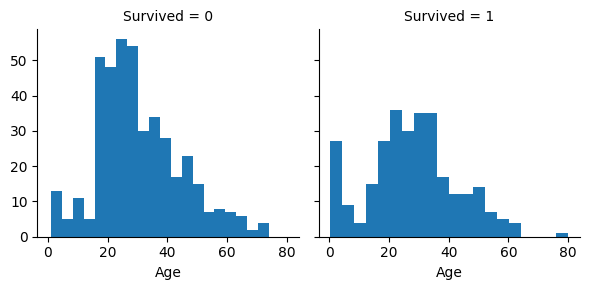

In [192]:
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)
# Greater chance of survival for babies and young children


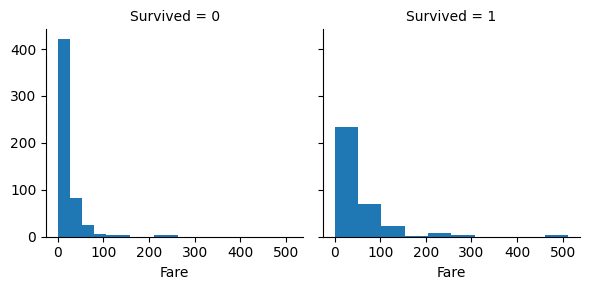

In [193]:
# Fare
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=10)
# Low chance of survival for the cheapest ticket


In [194]:
# Feature that tells whether a passenger had a cabin on the Titanic
train_df['HasCabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['HasCabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [195]:
# Remove the features Ticket (no human judgement correlation) and Cabin (too little valid data)
train_df = train_df.drop(["Ticket","Cabin"],axis=1)
test_df = test_df.drop(["Ticket","Cabin"],axis=1)
combine = [train_df,test_df]
print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

(891, 11) (418, 10) (891, 11) (418, 10)


In [196]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


In [197]:
# Categorise titles as Mr,Miss,Mrs,Master,Rare_Male,Rare_Female (with Rare differentiated by male and female)
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess', 'Dona'],"Rare_Female")
    dataset["Title"] = dataset["Title"].replace(['Capt', 'Col','Don','Dr','Major',
                                                 'Rev','Sir','Jonkheer',],"Rare_Male")
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

In [198]:
# Summarize Survived Means by Title to see correlation
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare_Female,1.000000
5,Rare_Male,0.285714


In [199]:
# Title features mapped to values
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare_Female":5,"Rare_Male":6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    # To avoid routine operations with empty data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


In [200]:
# Name field can be eliminated
# The PassengerId field in the training set is only self-incrementing, not relevant to prediction, and can be eliminated
train_df = train_df.drop(["Name","PassengerId"],axis=1)
test_df = test_df.drop(["Name"],axis=1)

In [201]:
# Recombine each time a feature is deleted
combine = [train_df,test_df]
combine[0].shape,combine[1].shape

((891, 10), (418, 10))

In [202]:
# Sex features mapped to values
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,3
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,1,3
4,0,3,0,35.0,0,0,8.0500,S,0,1


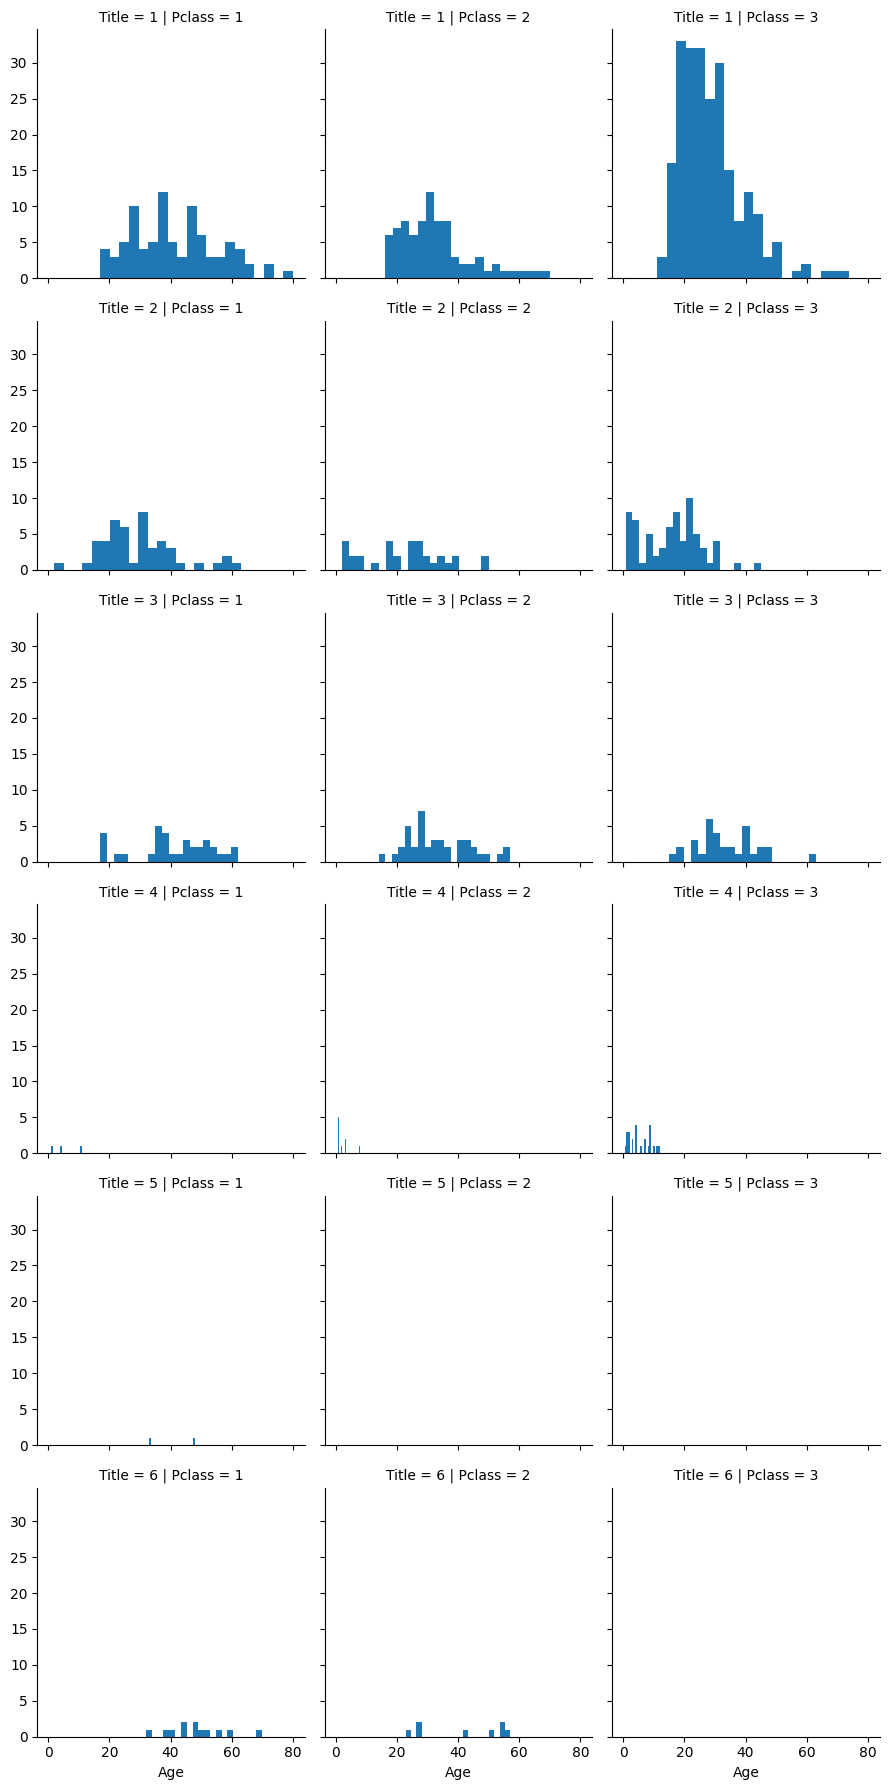

In [203]:
# Predictive supplementation for null values in the Age field
# Take the median age of the same Pclass and Title for supplementation (Demo for Pclass and Sex)

grid = sns.FacetGrid(train_df,col="Pclass",row="Title")
grid.map(plt.hist,"Age",bins=20)


In [204]:
guess_ages = np.zeros((6,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [205]:
# Populate valuation with empty values for the age field
# Use the median Age of the same Pclass and Title instead (for combinations where the median is empty, use the median of the Title as a whole instead)


for dataset in combine:
    # Take the median of the 6 combinations
    for i in range(0, 6):
        
        for j in range(0, 3):
            guess_title_df = dataset[dataset["Title"]==i+1]["Age"].dropna()
            
            guess_df = dataset[(dataset['Title'] == i+1) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median() if ~np.isnan(guess_df.median()) else guess_title_df.median()
            print(i,j,guess_df.median(),guess_title_df.median(),age_guess)
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    # Assign a value to the Age field that satisfies all 6 cases
    for i in range(0, 6):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i+1) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

0 0 40.0 30.0 40.0
0 1 31.0 30.0 31.0
0 2 26.0 30.0 26.0
1 0 29.5 21.5 29.5
1 1 24.0 21.5 24.0
1 2 18.0 21.5 18.0
2 0 41.5 35.0 41.5
2 1 32.0 35.0 32.0
2 2 31.0 35.0 31.0
3 0 4.0 3.5 4.0
3 1 1.0 3.5 1.0
3 2 4.0 3.5 4.0
4 0 40.5 40.5 40.5
4 1 nan 40.5 40.5
4 2 nan 40.5 40.5
5 0 49.0 49.0 49.0
5 1 46.5 49.0 46.5
5 2 nan 49.0 49.0
0 0 42.0 28.5 42.0
0 1 28.0 28.5 28.0
0 2 25.0 28.5 25.0
1 0 32.0 22.0 32.0
1 1 19.5 22.0 19.5
1 2 22.0 22.0 22.0
2 0 48.0 36.5 48.0
2 1 29.0 36.5 29.0
2 2 28.0 36.5 28.0
3 0 9.5 7.0 9.5
3 1 5.0 7.0 5.0
3 2 7.0 7.0 7.0
4 0 39.0 39.0 39.0
4 1 nan 39.0 39.0
4 2 nan 39.0 39.0
5 0 53.0 47.0 53.0
5 1 35.5 47.0 35.5
5 2 nan 47.0 47.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,0,3,0,22,1,0,7.2500,S,0,1
1,1,1,1,38,1,0,71.2833,C,1,3
2,1,3,1,26,0,0,7.9250,S,0,2
3,1,1,1,35,1,0,53.1000,S,1,3
4,0,3,0,35,0,0,8.0500,S,0,1


In [206]:
#Create whether child characteristics
for dataset in combine:
    dataset.loc[dataset["Age"] > 12,"IsChildren"] = 0
    dataset.loc[dataset["Age"] <= 12,"IsChildren"] = 1
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,IsChildren
0,0,3,0,22,1,0,7.2500,S,0,1,0.0
1,1,1,1,38,1,0,71.2833,C,1,3,0.0
2,1,3,1,26,0,0,7.9250,S,0,2,0.0
3,1,1,1,35,1,0,53.1000,S,1,3,0.0
4,0,3,0,35,0,0,8.0500,S,0,1,0.0


In [207]:
# Create age interval features
# pd.cut is a uniform cut by the size of the value, each set of value intervals is the same size, but the number of samples may not be the same
# pd.qcut is cut by frequency of distribution of samples over values, same number of samples per group
train_df["AgeBand"] = pd.qcut(train_df["Age"],8)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index = False).mean().sort_values(by="AgeBand",ascending=True)

,AgeBand,Survived
0,"(-0.001, 17.0]",0.538462
1,"(17.0, 21.0]",0.362903
2,"(21.0, 25.0]",0.393939
3,"(25.0, 26.0]",0.120370
4,"(26.0, 31.0]",0.414062
5,"(31.0, 36.5]",0.478261
6,"(36.5, 45.0]",0.388430
7,"(45.0, 80.0]",0.372549


In [208]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 2
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 26), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 36.5), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36.5) & (dataset['Age'] <= 45), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,IsChildren,AgeBand
0,0,3,0,1,1,0,7.2500,S,0,1,0.0,"(21.0, 25.0]"
1,1,1,1,1,1,0,71.2833,C,1,3,0.0,"(36.5, 45.0]"
2,1,3,1,0,0,0,7.9250,S,0,2,0.0,"(25.0, 26.0]"
3,1,1,1,2,1,0,53.1000,S,1,3,0.0,"(31.0, 36.5]"
4,0,3,0,2,0,0,8.0500,S,0,1,0.0,"(31.0, 36.5]"


In [209]:
# Remove AgeBand features
train_df = train_df.drop(["AgeBand"],axis=1)
combine = [train_df,test_df]
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,IsChildren
0,0,3,0,1,1,0,7.2500,S,0,1,0.0
1,1,1,1,1,1,0,71.2833,C,1,3,0.0
2,1,3,1,0,0,0,7.9250,S,0,2,0.0
3,1,1,1,2,1,0,53.1000,S,1,3,0.0
4,0,3,0,2,0,0,8.0500,S,0,1,0.0


In [210]:
for dataset in combine:
    dataset["FamilySize"] = dataset["Parch"] + dataset["SibSp"] + 1
train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index = False).mean().sort_values(by="FamilySize",ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [211]:
# Create whether the IsAlone feature is alone
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1,"IsAlone"] = 1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [212]:
for dataset in combine:    
    dataset.loc[ dataset['FamilySize'] == 1, 'FamilySize'] = 2
    dataset.loc[ dataset['FamilySize'] == 2, 'FamilySize'] = 3
    dataset.loc[ dataset['FamilySize'] == 3, 'FamilySize'] = 3
    dataset.loc[ dataset['FamilySize'] == 4, 'FamilySize'] = 4
    dataset.loc[ dataset['FamilySize'] == 5, 'FamilySize'] = 1
    dataset.loc[ dataset['FamilySize'] == 6, 'FamilySize'] = 0
    dataset.loc[ dataset['FamilySize'] == 7, 'FamilySize'] = 1
    dataset.loc[ dataset['FamilySize'] == 8, 'FamilySize'] = 0
    dataset.loc[ dataset['FamilySize'] == 11, 'FamilySize'] = 0
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,0,1,0.0,3,0
1,1,1,1,1,1,0,71.2833,C,1,3,0.0,3,0
2,1,3,1,0,0,0,7.9250,S,0,2,0.0,3,1
3,1,1,1,2,1,0,53.1000,S,1,3,0.0,3,0
4,0,3,0,2,0,0,8.0500,S,0,1,0.0,3,1


In [213]:
# Remove Parch,Sibsp
# Assign a value to a field can be looped in the combine, delete a field can not, you need to operate on the specified df
train_df = train_df.drop(["Parch","SibSp"],axis=1)
test_df = test_df.drop(["Parch","SibSp"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,0,1,0.0,3,0
1,1,1,1,1,71.2833,C,1,3,0.0,3,0
2,1,3,1,0,7.9250,S,0,2,0.0,3,1
3,1,1,1,2,53.1000,S,1,3,0.0,3,0
4,0,3,0,2,8.0500,S,0,1,0.0,3,1


In [214]:
freq_port = train_df["Embarked"].dropna().mode()[0]
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [215]:
# Digitising Embarked
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":1,"C":2,"Q":0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,1,7.2500,1,0,1,0.0,3,0
1,1,1,1,1,71.2833,2,1,3,0.0,3,0
2,1,3,1,0,7.9250,1,0,2,0.0,3,1
3,1,1,1,2,53.1000,1,1,3,0.0,3,0
4,0,3,0,2,8.0500,1,0,1,0.0,3,1


In [216]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   HasCabin     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   IsChildren   418 non-null    float64
 9   FamilySize   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [217]:
# Create FareBand interval features
train_df["FareBand"] = pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [218]:
# Convert Fare features to ordinal values based on FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,1,0,1,0,1,0.0,3,0
1,1,1,1,1,3,2,1,3,0.0,3,0
2,1,3,1,0,1,1,0,2,0.0,3,1
3,1,1,1,2,3,1,1,3,0.0,3,0
4,0,3,0,2,1,1,0,1,0.0,3,1
5,0,3,0,0,1,0,0,1,0.0,3,1
6,0,1,0,1,3,1,1,1,0.0,3,1
7,0,3,0,2,2,1,0,4,1.0,1,0
8,1,3,1,1,1,1,0,3,0.0,3,0
9,1,2,1,2,2,2,0,3,0.0,3,0


<AxesSubplot: title={'center': 'Pearson Correlation of Features'}>

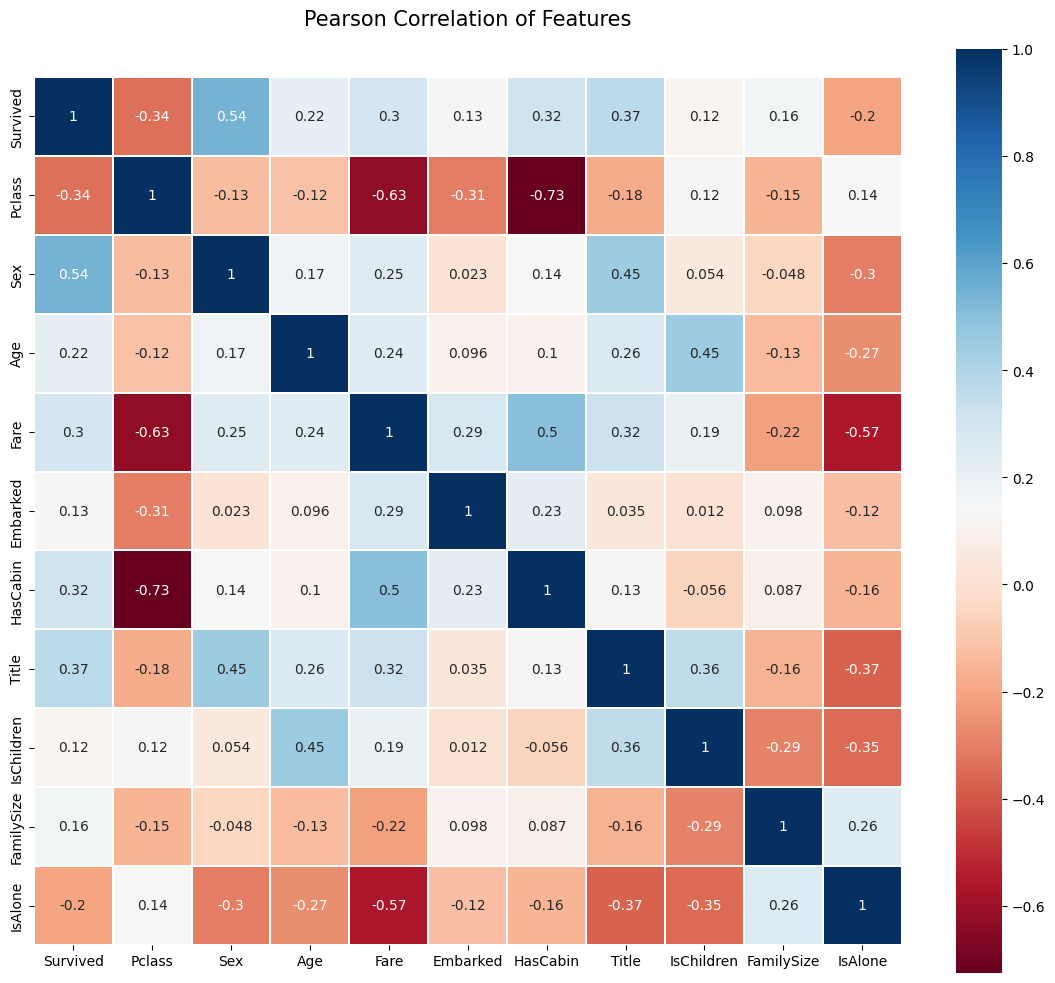

In [219]:
# Visualize correlations between features with seaborn's heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [220]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,1,0,1,0,1,0.0,3,0
1,1,1,1,1,3,2,1,3,0.0,3,0
2,1,3,1,0,1,1,0,2,0.0,3,1
3,1,1,1,2,3,1,1,3,0.0,3,0
4,0,3,0,2,1,1,0,1,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,1,0,6,0.0,3,1
887,1,1,1,1,2,1,1,2,0.0,3,1
888,0,3,1,1,2,1,0,2,0.0,4,0
889,1,1,0,0,2,2,1,1,0.0,3,1


In [326]:
# %load lazy_pipeline.py
import time
from typing import Iterator, List, Collection, Callable

import pandas as pd
from tqdm import tqdm

# A very general type hint for a prediction function.
# A prediction function takes a triplet of (test object description, train descriptions, train labels)
# and outputs a bool prediction
PREDICTION_FUNCTION_HINT = Callable[
    [Collection, Collection[Collection], Collection[bool]], bool
]


def load_data(df_name: str) -> pd.DataFrame:
    """Generalized function to load datasets in the form of pandas.DataFrame"""
    if df_name == 'tic_tac_toe':
        return load_tic_tac_toe()

    raise ValueError(f'Unknown dataset name: {df_name}')


def load_tic_tac_toe() -> pd.DataFrame:
    """Load tic-tac-toe dataset from UCI repository"""
    column_names = [
        'top-left-square', 'top-middle-square', 'top-right-square',
        'middle-left-square', 'middle-middle-square', 'middle-right-square',
        'bottom-left-square', 'bottom-middle-square', 'bottom-right-square',
        'Class'
    ]
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
    df = pd.read_csv(url, names=column_names)
    df['Class'] = [x == 'positive' for x in df['Class']]
    return df


def binarize_X(X: pd.DataFrame) -> 'pd.DataFrame[bool]':
    """Scale values from X into pandas.DataFrame of binary values"""
    dummies = [pd.get_dummies(X[f], prefix=f, prefix_sep=': ') for f in X.columns]
    X_bin = pd.concat(dummies, axis=1).astype(bool)
    return X_bin


def predict_with_generators(
        x: set, X_train: List[set], Y_train: List[bool],
        min_cardinality: int = 1
) -> bool:
    """Lazy prediction for ``x`` based on training data ``X_train`` and ``Y_train``

    Parameters
    ----------
    x : set
        Description to make prediction for
    X_train: List[set]
        List of training examples
    Y_train: List[bool]
        List of labels of training examples
    min_cardinality: int
        Minimal size of an intersection required to count for counterexamples

    Returns
    -------
    prediction: bool
        Class prediction for ``x`` (either True or False)
    """
    X_pos = [x_train for x_train, y in zip(X_train, Y_train) if y]
    X_neg = [x_train for x_train, y in zip(X_train, Y_train) if not y]

    n_counters_pos = 0  # number of counter examples for positive intersections
    for x_pos in X_pos:
        intersection_pos = x & x_pos
        if len(intersection_pos) < min_cardinality:  # the intersection is too small
            continue

        for x_neg in X_neg:  # count all negative examples that contain intersection_pos
            if (intersection_pos & x_neg) == intersection_pos:
                n_counters_pos += 1
                       
    n_counters_neg = 0  # number of counter examples for negative intersections
    for x_neg in X_neg:
        intersection_neg = x & x_neg
        if len(intersection_neg) < min_cardinality:
            continue

        for x_pos in X_pos:  # count all positive examples that contain intersection_neg
            if (intersection_neg & x_pos) == intersection_neg:
                n_counters_neg += 1

    perc_counters_pos = n_counters_pos / len(X_pos)
    perc_counters_neg = n_counters_neg / len(X_neg)

    prediction = perc_counters_pos < perc_counters_neg
    return prediction

def predict_array(
        X: List[set], Y: List[bool],
        n_train: int, update_train: bool = True, use_tqdm: bool = False,
        predict_func: PREDICTION_FUNCTION_HINT = predict_with_generators
) -> Iterator[bool]:
    """Predict the labels of multiple examples from ``X``

    Parameters
    ----------
    X: List[set]
        Set of train and test examples to classify represented with subsets of attributes
    Y: List[bool]
        Set of train and test labels for each example from X
    n_train: int
        Initial number of train examples. That is, make predictions only for examples from X_train[n_train:]
    update_train: bool
        A flag whether to consider true labels of predicted examples as training data or not.
        If True, then for each X_i the training data consists of X_1, X_2, ..., X_{n_train}, ...,  X_{i-1}.
        If False, then for each X_i the training data consists of X_1, X_2, ..., X_{n_train}
    use_tqdm: bool
        A flag whether to use tqdm progress bar (in case you like progress bars)
    predict_func: <see PREDICTION_FUNCTION_HINT defined in this file>
        A function to make prediction for each specific example from ``X``.
        The default prediction function is ``predict_with_generator`` (considered as baseline for the home work).

    Returns
    -------
    prediction: Iterator
        Python generator with predictions for each x in X[n_train:]
    """
    for i, x in tqdm(
        enumerate(X[n_train:]),
        initial=n_train, total=len(X),
        desc='Predicting step by step',
        disable=not use_tqdm,
    ):
        n_trains = n_train + i if update_train else n_train
        yield predict_func(x, X[:n_trains], Y[:n_trains])


def apply_stopwatch(iterator: Iterator):
    """Measure run time of each iteration of ``iterator``

    The function can be applied e.g. for the output of ``predict_array`` function
    """
    outputs = []
    times = []

    t_start = time.time()
    for out in iterator:
        dt = time.time() - t_start
        outputs.append(out)
        times.append(dt)
        t_start = time.time()

    return outputs, times


In [327]:
y_name = 'Survived'
y = train_df[y_name]
X = binarize_X(train_df.drop(y_name, axis=1))
print(X.shape)
X.head()

(891, 31)


,Pclass: 1,Pclass: 2,Pclass: 3,Sex: 0,Sex: 1,Age: 0,Age: 1,Age: 2,Fare: 0,Fare: 1,...,Title: 5,Title: 6,IsChildren: 0.0,IsChildren: 1.0,FamilySize: 0,FamilySize: 1,FamilySize: 3,FamilySize: 4,IsAlone: 0,IsAlone: 1
0,False,False,True,True,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False
1,True,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
2,False,False,True,False,True,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,False,True,False
4,False,False,True,True,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True


In [328]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(89, 802)

In [329]:
y_test = y[n_train:]

In [330]:
%%time
gen = predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = apply_stopwatch(gen)

Predicting step by step: 100%|████████████████| 891/891 [00:19<00:00, 40.33it/s]

CPU times: user 19.8 s, sys: 124 ms, total: 19.9 s
Wall time: 19.9 s


In [331]:
%%time
gen = list(predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = apply_stopwatch(gen)

Predicting step by step: 100%|██████████████| 891/891 [00:00<00:00, 1152.96it/s]

CPU times: user 693 ms, sys: 7.18 ms, total: 700 ms
Wall time: 699 ms


In [332]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipy

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipyke

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipy

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipy

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipy

/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipykernel_3470/2727088715.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
/var/folders/j7/jq7zvfpd7qb610n57fjz1j2w0000gn/T/ipy

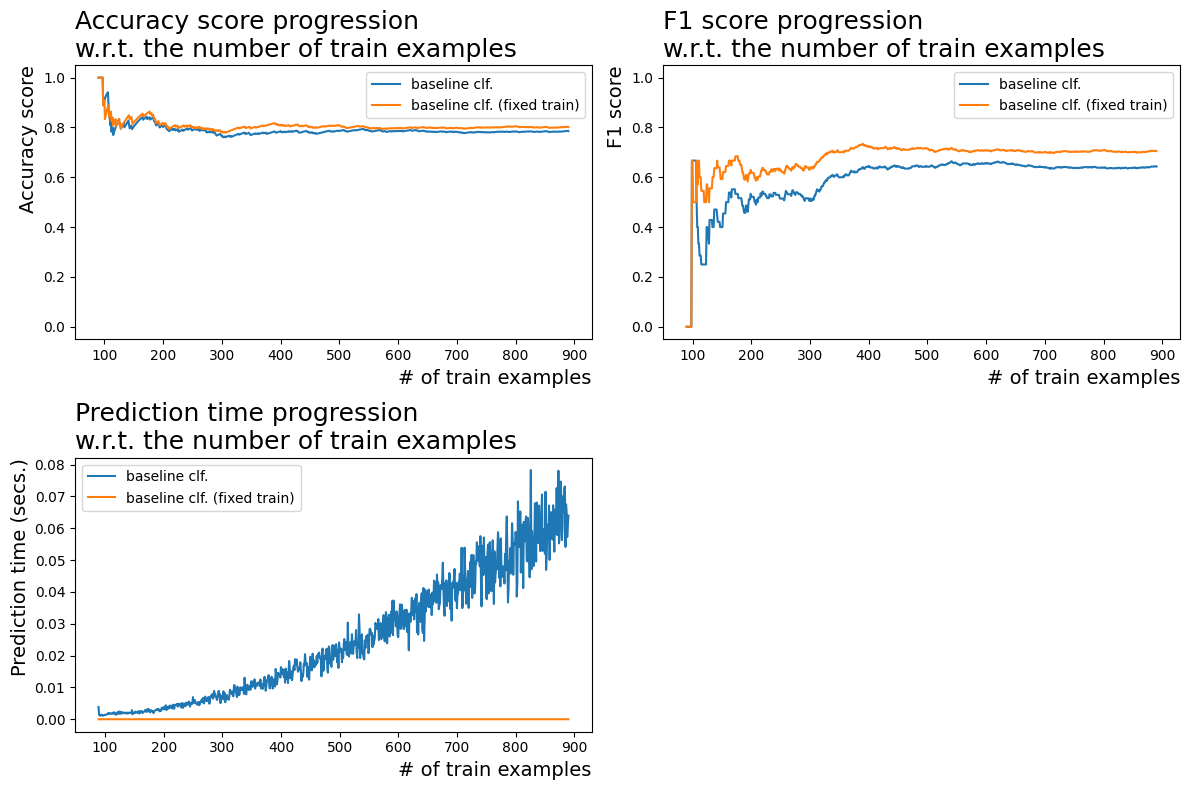

In [333]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [334]:
# LazyFCA
acc_fca = round(sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100,2)
acc_fca

79.05

In [376]:
print('precision_score',precision_score(y_test,y_preds))
print('recall_score',recall_score(y_test,y_preds))

precision_score 0.3575418994413408
recall_score 0.20512820512820512


In [343]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 10), (891,), (418, 10))

In [276]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

82.15

In [372]:
log_pred_train = cross_val_predict(logreg, X_train, Y_train, cv = 3)
print('precision_score',precision_score(Y_train, log_pred_train ))
print('recall_score',recall_score(Y_train, log_pred_train ))

precision_score 0.7602523659305994
recall_score 0.7046783625730995


In [277]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [369]:
svc_clf_pred_train = cross_val_predict(svc, X_train, Y_train, cv = 3)
print('precision_score',precision_score(Y_train, svc_clf_pred_train ))
print('recall_score',recall_score(Y_train, svc_clf_pred_train ))

precision_score 0.8131147540983606
recall_score 0.7251461988304093


In [278]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.3

In [367]:
Y_train_pred_knn = cross_val_predict(knn_clf, X_train, Y_train, cv = 3)
print('precision_score',precision_score(Y_train, Y_train_pred_knn))
print('recall_score',recall_score(Y_train, Y_train_pred_knn))

precision_score 0.8156028368794326
recall_score 0.672514619883041


In [279]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.78

In [373]:
DT_clf_pred_train = cross_val_predict(decision_tree, X_train, Y_train, cv = 3)
print('precision_score',precision_score(Y_train, DT_clf_pred_train ))
print('recall_score',recall_score(Y_train, DT_clf_pred_train ))

precision_score 0.7919463087248322
recall_score 0.6900584795321637


In [361]:
#Random Forest
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [364]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, Y_train)
cross_forest_score = cross_val_score(forest_clf, X_train, Y_train, cv = 10, scoring = 'accuracy')
cross_forest_score.mean()


0.8271785268414481

In [365]:
Y_train_pred_forest = cross_val_predict(forest_clf, X_train, Y_train, cv = 3)
print('precision_score',precision_score(Y_train, Y_train_pred_forest))
print('recall_score',recall_score(Y_train, Y_train_pred_forest))

precision_score 0.8006535947712419
recall_score 0.716374269005848
